In [1]:
# Decision Tree

We will have a look at the 'Carseats' data using the 'tree' package in R.

We create a binary response variable 'High'(for high sales), and we include it in the same dataframe.

In [2]:
install.packages("ISLR")

Installing package into 'C:/Users/anura/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anura\AppData\Local\Temp\Rtmp4yHVha\downloaded_packages


In [3]:
require(ISLR)

Loading required package: ISLR

Warning message:
"package 'ISLR' was built under R version 3.6.2"


In [4]:
install.packages("tree")

Installing package into 'C:/Users/anura/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anura\AppData\Local\Temp\Rtmp4yHVha\downloaded_packages


In [5]:
require(tree)

Loading required package: tree

Warning message:
"package 'tree' was built under R version 3.6.2"


In [6]:
attach(Carseats)

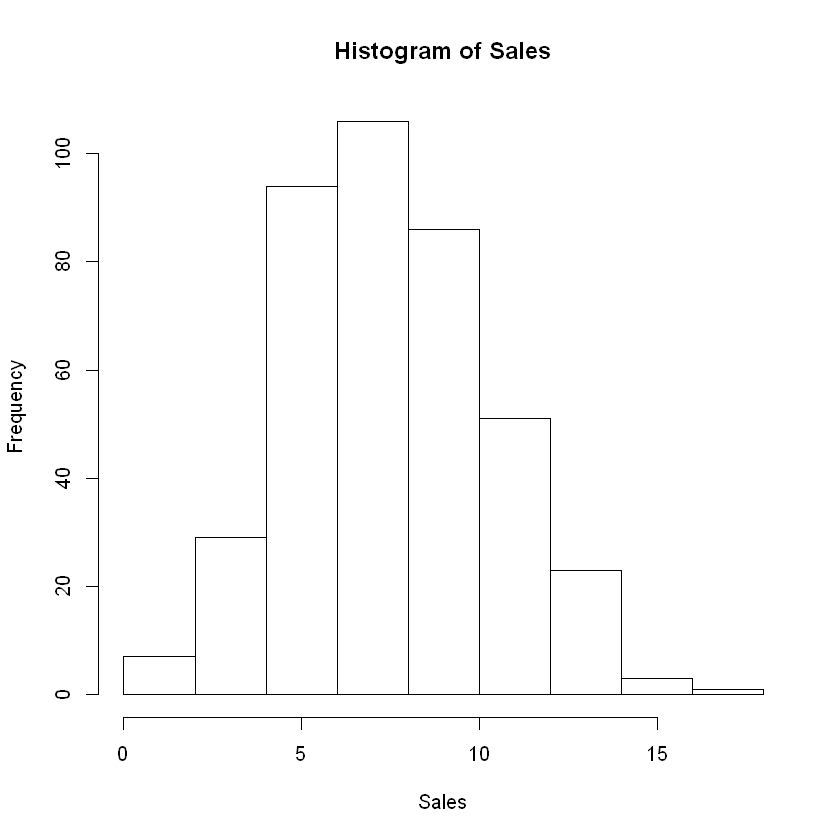

In [7]:
hist(Sales)

In [8]:
High = ifelse(Sales<=8, "No","Yes")

In [9]:
Carseats=data.frame(Carseats, High)

Now we fit a tree to these data, and summarize and plot it. Notice that we have to  _exclude_ 'Sales' from the right-hand side of the formula, because the responce is derived from it.

In [10]:
tree.carseats=tree(High~. -Sales, data=Carseats)

In [11]:
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

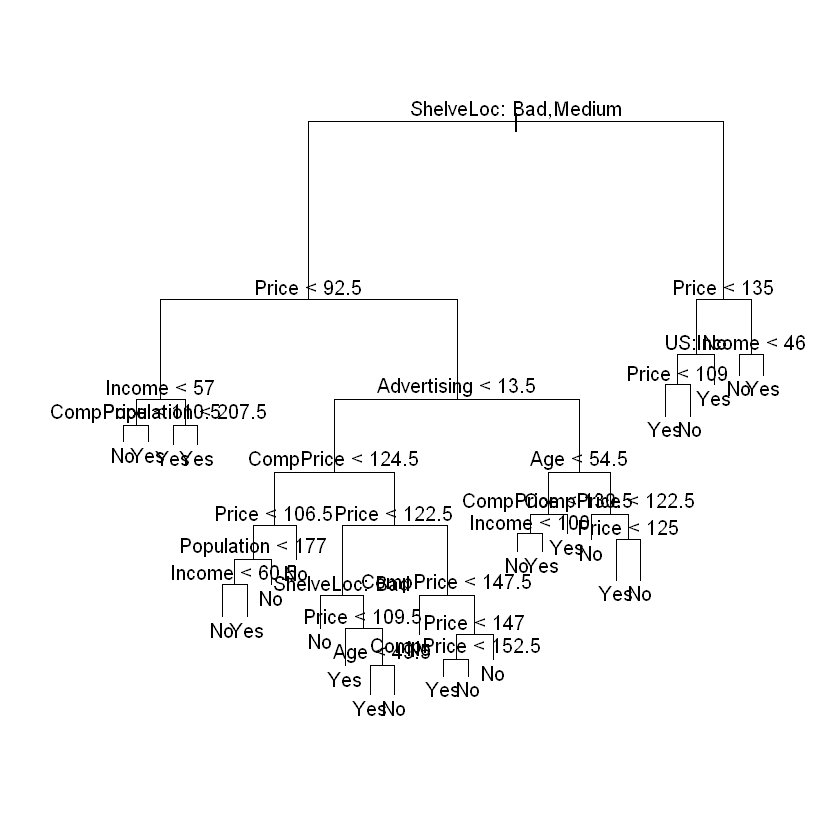

In [12]:
plot(tree.carseats)

text(tree.carseats, pretty=0)

In [13]:
# For a detailed summary of the tree, print it:

In [14]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

Lets create a training and test set (250,150) split of the 400 observations, grow the tree on the training set, and evaluate its performance on the test set.

In [15]:
set.seed(1011)

In [16]:
train = sample(1:nrow(Carseats), 250)

In [17]:
tree.carseats = tree(High~. -Sales, Carseats, subset=train)

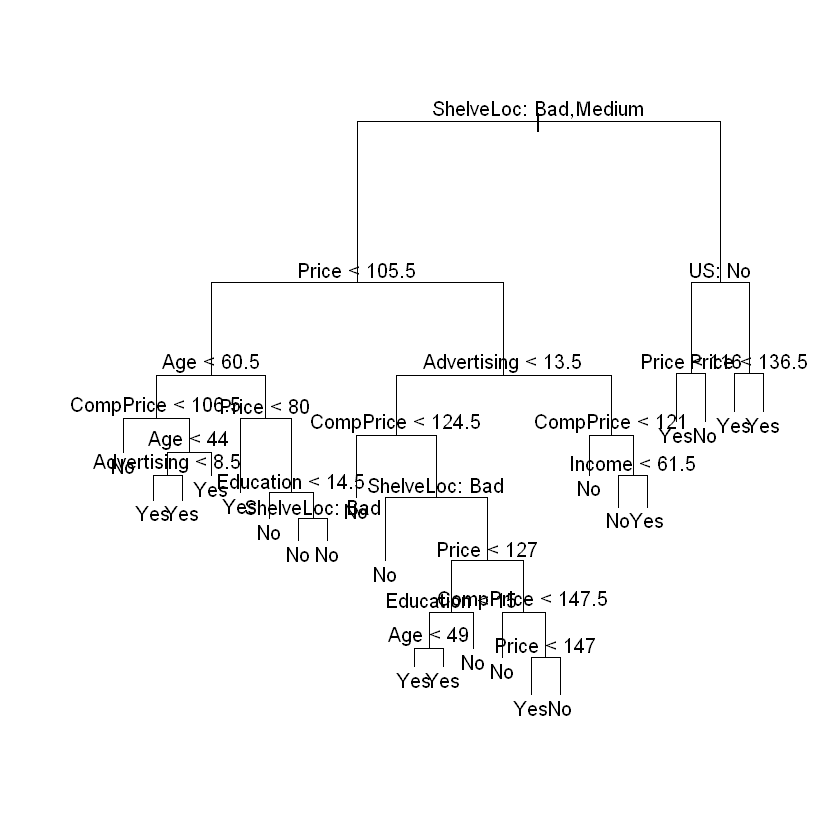

In [18]:
plot(tree.carseats)
text(tree.carseats, pretty=0)

In [19]:
tree.pred=predict(tree.carseats,Carseats[-train,],type="class")

with(Carseats[-train,],table(tree.pred, High))

         High
tree.pred No Yes
      No  58  20
      Yes 27  45

In [20]:
(75+43)/150

[1] 0.7866667

This tree was grown to full depth, and might be too variable. we now use cv to prune it.

In [21]:
cv.carseats = cv.tree(tree.carseats, FUN=prune.misclass)
cv.carseats

$size
 [1] 23 17 16 14 10  8  6  5  4  2  1

$dev
 [1]  62  62  60  61  69  81  79  81  81  81 100

$k
 [1] -Inf  0.0  1.0  1.5  2.0  3.0  3.5  5.0  6.0  7.0 27.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

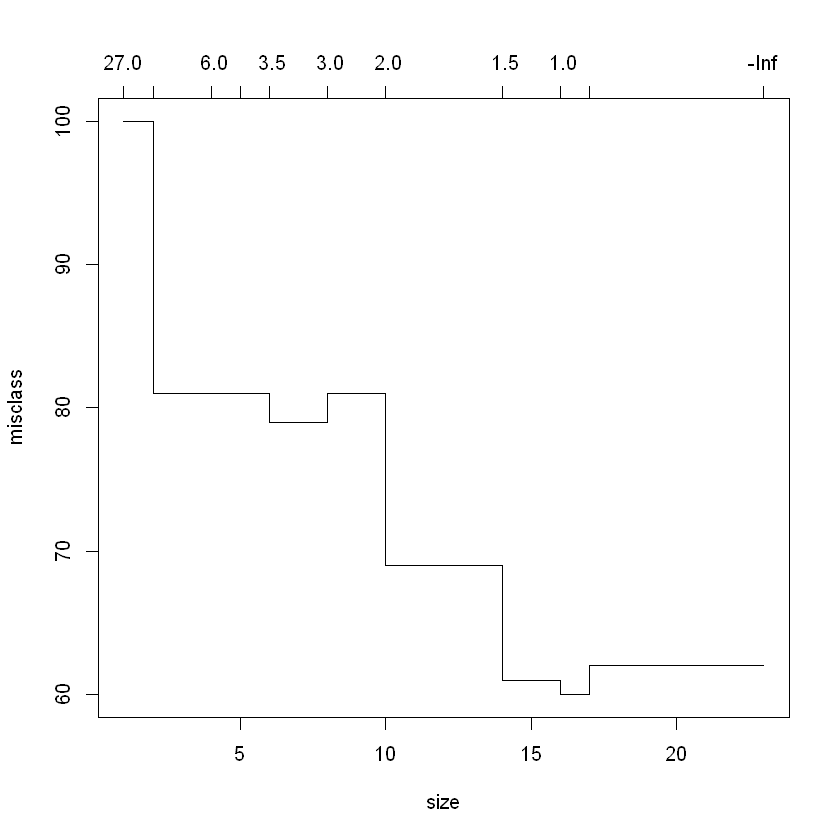

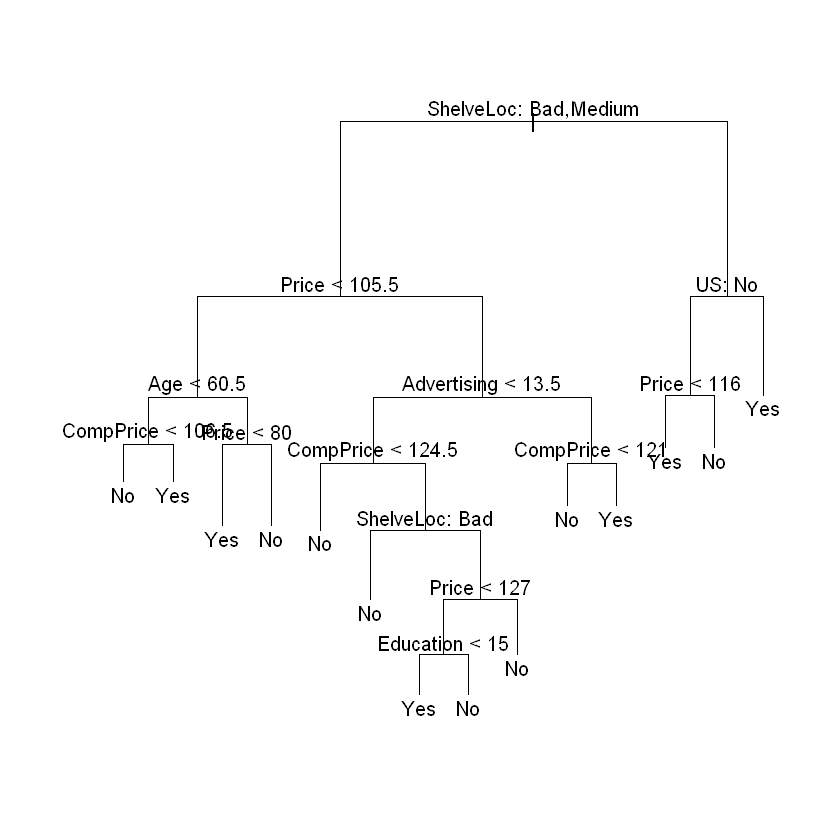

In [22]:
plot(cv.carseats)
prune.carseats= prune.misclass(tree.carseats, best=13)
plot(prune.carseats)
text(prune.carseats, pretty=0)